0.6575537153327434


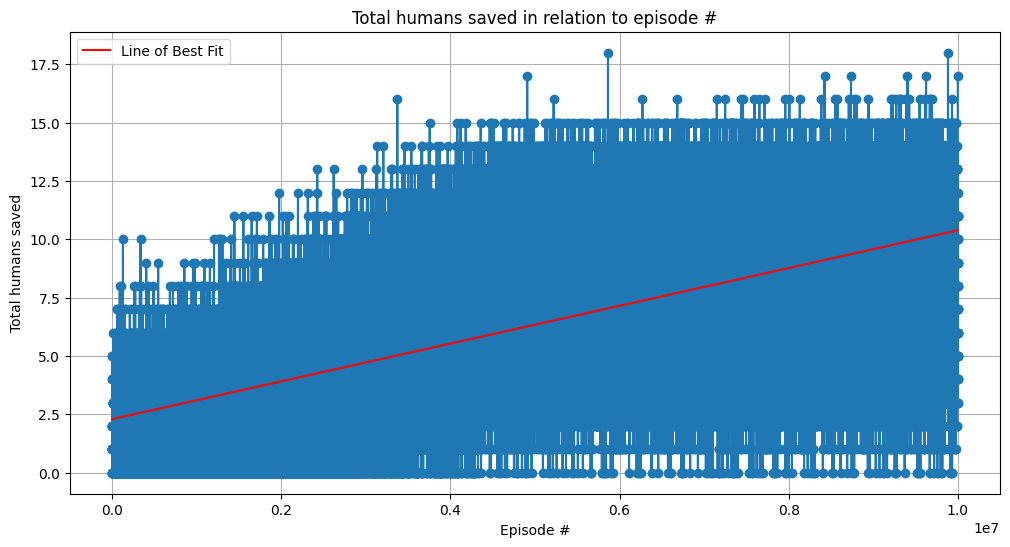

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

csv_file_path = os.path.join(os.path.dirname(os.path.abspath('')), 'data_analysis', '10_mil_results.csv')
data_frame = pd.read_csv(csv_file_path)

data_frame['total # saved'] = (data_frame['saved_h'] + data_frame['saved_in'])

x_column = 'iteration'
y_column = 'total # saved'

x_values_to_plot = data_frame[x_column][::]
y_values_to_plot = data_frame[y_column][::]

coefficients = np.polyfit(x_values_to_plot, y_values_to_plot, 1)
line_of_best_fit = np.polyval(coefficients, x_values_to_plot)
r_value, _ = pearsonr(x_values_to_plot, y_values_to_plot)

print(r_value)

plt.figure(figsize=(12, 6))


plt.plot(x_values_to_plot, y_values_to_plot, marker='o', linestyle='-')
plt.plot(x_values_to_plot, line_of_best_fit, linestyle='-', color='red', label='Line of Best Fit')
plt.xlabel('Episode #')
plt.ylabel('Total humans saved')
plt.title('Total humans saved in relation to episode #')
plt.grid(True)
plt.legend()
plt.show()

0.6483032042977488


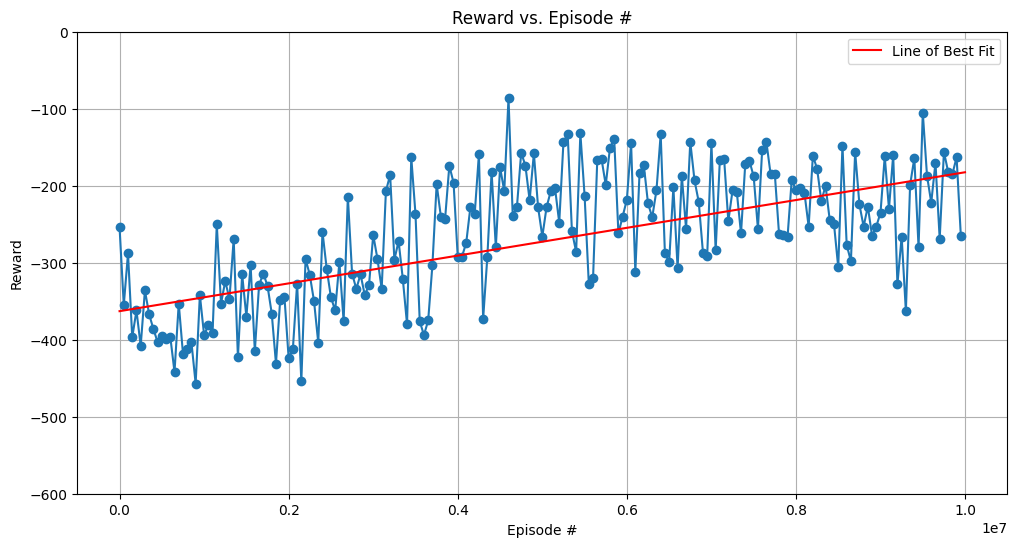

In [49]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import os
# from scipy.stats import pearsonr
#
# csv_file_path = os.path.join(os.path.dirname(os.path.abspath('')), 'data_analysis', 'results.csv')
# data_frame = pd.read_csv(csv_file_path)

# Check data types and convert if needed
data_frame['reward'] = pd.to_numeric(data_frame['reward'], errors='coerce')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check for NaN values
if data_frame['reward'].isnull().values.any():
    print("Warning: There are NaN or non-numeric values in the 'reward' column.")

# Set figure size and plot the data
plt.figure(figsize=(12, 6))

x_column = 'iteration'
y_column = 'reward'

# Set y-axis limits to a specific range (adjust as needed)
plt.ylim(-600, 0)

column_data = data_frame[y_column]
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
filtered_data_frame = data_frame[(column_data >= lower_bound)]

coefficients = np.polyfit(filtered_data_frame[x_column], filtered_data_frame[y_column], 1)
line_of_best_fit = np.polyval(coefficients, filtered_data_frame[x_column])
r_value, _ = pearsonr(filtered_data_frame[x_column], filtered_data_frame[y_column])

print(r_value)

# Plot all the values excluding outliers
plt.plot(filtered_data_frame[x_column][::500], filtered_data_frame[y_column][::500], marker='o', linestyle='-')
plt.plot(filtered_data_frame[x_column], line_of_best_fit, linestyle='-', color='red', label='Line of Best Fit')
plt.xlabel('Episode #')
plt.ylabel('Reward')
plt.title('Reward vs. Episode #')
plt.legend()
plt.grid(True)

plt.show()

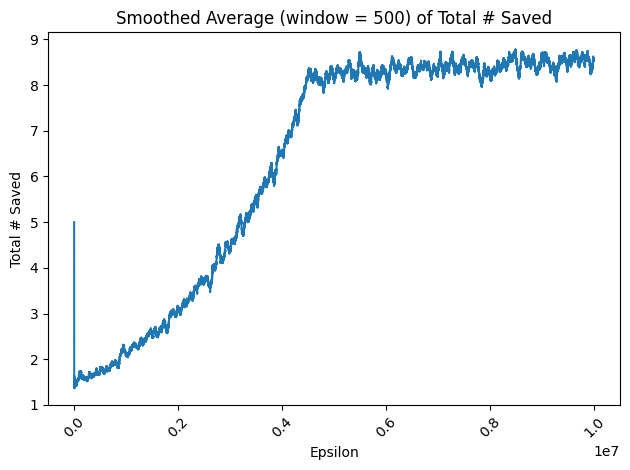

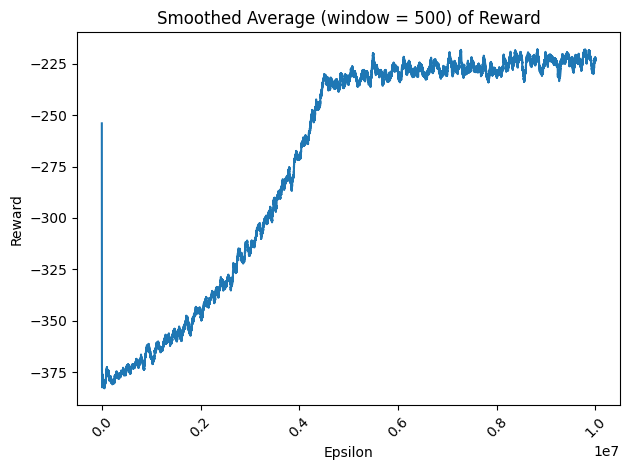

In [53]:
# Calculate the rolling average
data_frame['Smoothed_Avg_saved'] = data_frame['total # saved'].rolling(window=500, min_periods=1).mean()
data_frame['Smoothed_Avg_reward'] = data_frame['reward'].rolling(window=500, min_periods=1).mean()

# Plot using Matplotlib
plt.figure()
plt.plot(data_frame['iteration'], data_frame['Smoothed_Avg_saved'])
plt.xlabel('Epsilon')
plt.ylabel('Total # Saved')
plt.title('Smoothed Average (window = 500) of Total # Saved')
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure()
plt.plot(data_frame['iteration'], data_frame['Smoothed_Avg_reward'])
plt.xlabel('Epsilon')
plt.ylabel('Reward')
plt.title('Smoothed Average (window = 500) of Reward')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()